# Exploratory Data Analysis

## Review

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
!gdown --id 1WfYcefUHaSPmCNEyGzLavDeN9kirCSW2  # train
!gdown --id 1xCrCN20LBcATpEiXOcZrsRhe0jRfei9Y  # test

# source
# https://www.kaggle.com/competitions/spaceship-titanic/data

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1WfYcefUHaSPmCNEyGzLavDeN9kirCSW2
To: /content/train.csv
100% 805k/805k [00:00<00:00, 78.2MB/s]
/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1xCrCN20LBcATpEiXOcZrsRhe0jRfei9Y
To: /content/test.csv
100% 372k/372k [00:00<00:00, 91.0MB/s]


In [54]:
train_df = pd.read_csv('/content/train.csv')
train_df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


<b> Rows under the index 2 and 3 in the 'Name' have the same last names, and the same numbers for 'PassengerId' before '_'. Might be worth checking this for some pattern

In [55]:
test_df = pd.read_csv('/content/test.csv')
test_df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [56]:
train_df['Transported'].value_counts()  # balanced classes

True     4378
False    4315
Name: Transported, dtype: int64

In [57]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [58]:
train_df.describe()  # Age minimum is 0? Maybe it is not ok

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [59]:
train_df.nunique()  # VIP and CryoSleep are objects, although in fact they are bool

PassengerId     8693
HomePlanet         3
CryoSleep          2
Cabin           6560
Destination        3
Age               80
VIP                2
RoomService     1273
FoodCourt       1507
ShoppingMall    1115
Spa             1327
VRDeck          1306
Name            8473
Transported        2
dtype: int64

In [60]:
train_df.duplicated().sum()  # no duplicates

0

In [61]:
# But we have duplicates by Name

mask = train_df[(train_df['Name'].duplicated()) &
                (train_df['Name'].notna())]['Name']
print(f'Number of duplicate values: {mask.size}')

Number of duplicate values: 20


In [62]:
dup_by_name = train_df[train_df['Name'].isin(mask)].sort_values('Name')
dup_by_name.head(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
7270,7775_01,Europa,False,C/253/P,55 Cancri e,28.0,False,7.0,489.0,0.0,4.0,6027.0,Alraium Disivering,False
6296,6665_01,Europa,True,B/222/P,55 Cancri e,17.0,False,0.0,0.0,0.0,0.0,0.0,Alraium Disivering,True
476,0512_02,Europa,True,D/18/S,TRAPPIST-1e,55.0,False,0.0,0.0,0.0,0.0,0.0,Ankalik Nateansive,True
2930,3176_01,Europa,False,E/196/P,TRAPPIST-1e,77.0,False,0.0,9032.0,0.0,128.0,1464.0,Ankalik Nateansive,True
8488,9071_01,Earth,False,F/1855/P,55 Cancri e,22.0,False,0.0,0.0,1072.0,46.0,3.0,Anton Woody,False
2991,3236_03,Earth,False,E/200/P,TRAPPIST-1e,18.0,False,0.0,30.0,0.0,756.0,5.0,Anton Woody,False
2559,2746_01,Mars,False,F/569/P,TRAPPIST-1e,52.0,False,758.0,0.0,356.0,5.0,0.0,Apix Wala,False
4108,4387_01,Mars,False,F/902/P,PSO J318.5-22,32.0,False,192.0,0.0,441.0,18.0,0.0,Apix Wala,False
7871,8398_01,Europa,True,B/329/S,TRAPPIST-1e,15.0,False,0.0,0.0,0.0,0.0,0.0,Asch Stradick,True
6086,6432_01,Europa,False,D/202/P,55 Cancri e,55.0,False,114.0,222.0,0.0,2575.0,2919.0,Asch Stradick,False


In [63]:
del mask
del dup_by_name

<b> But it looks like they are actually not duplicates in reality, since the values in other features are significantly different from each other

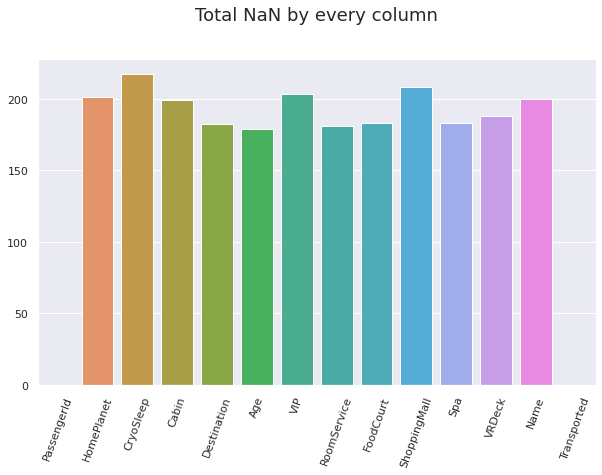

In [64]:
nans = train_df.isna().sum()
ax = sns.barplot(x=nans.index, y=nans)

ax.set_xticklabels(ax.get_xticklabels(),rotation = 70)
ax.set_title('Total NaN by every column', y=1.1, fontdict={'fontsize': 18})

plt.show()

In [65]:
del nans

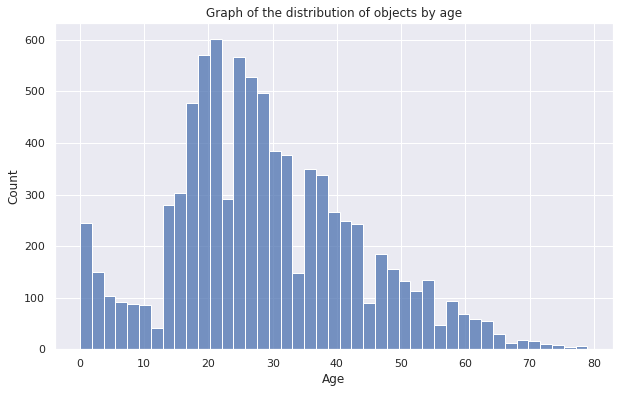

In [66]:
sns.histplot(train_df['Age']).set(
    title='Graph of the distribution of objects by age')

plt.show()

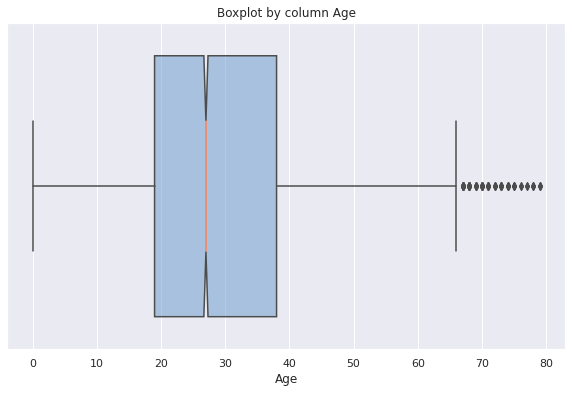

In [67]:
# no outliers (70-80 is possible)

sns.boxplot(x=train_df['Age'], notch=True, medianprops={"color": "coral"},
            boxprops={"facecolor": (.4, .6, .8, .5)}) \
    .set(title='Boxplot by column Age')

plt.show()

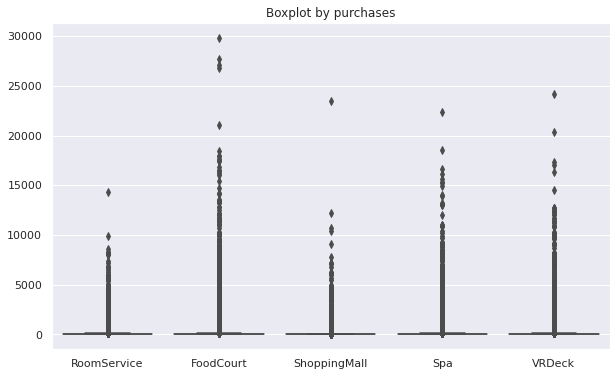

In [68]:
sns.boxplot(data=train_df[['RoomService', 'FoodCourt',
            'ShoppingMall', 'Spa', 'VRDeck']]) \
    .set(title='Boxplot by purchases')
plt.show()

## Looking at relationships of numerical features

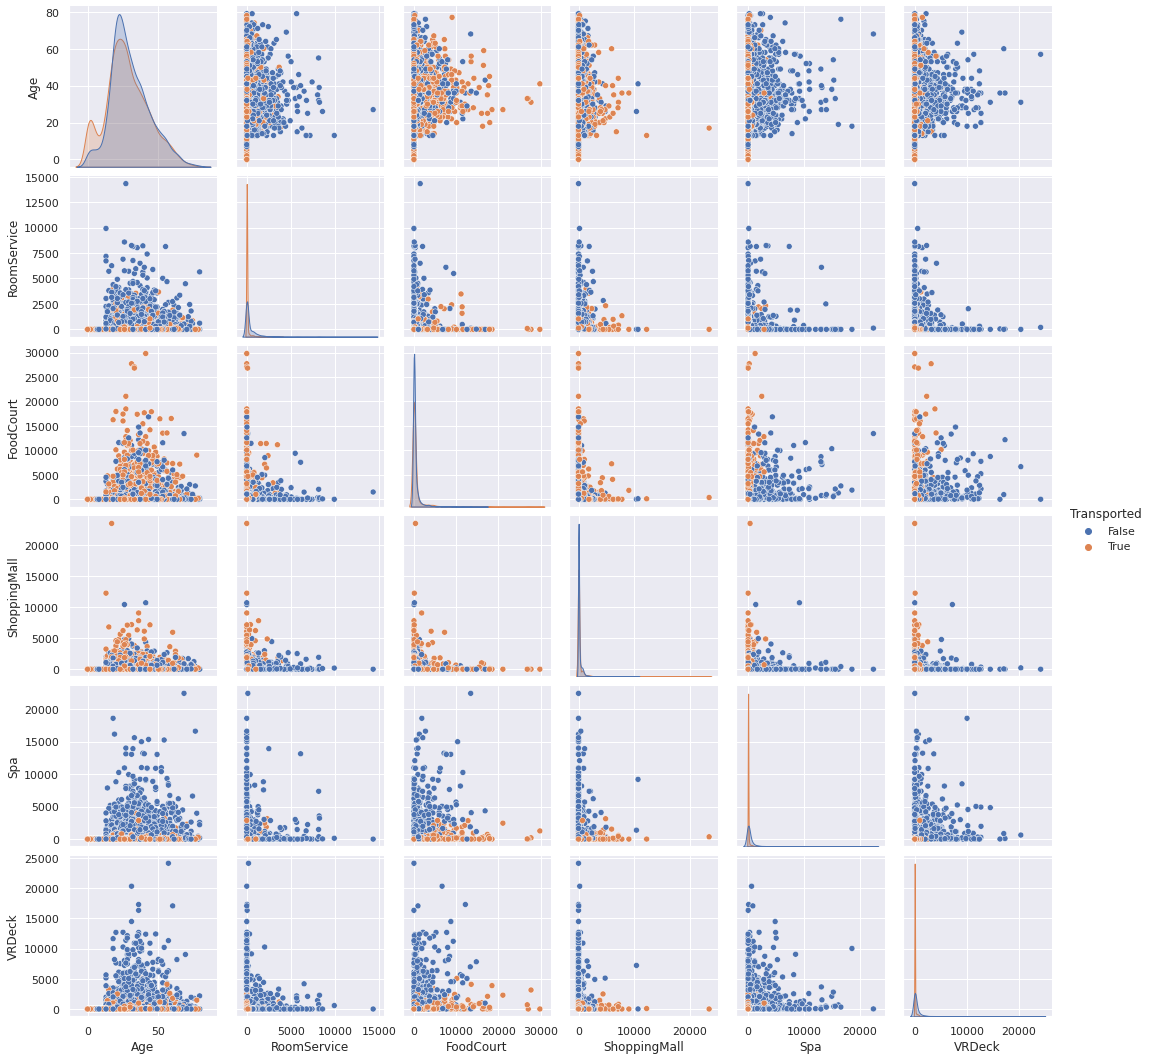

In [69]:
sns.pairplot(train_df,
             x_vars=train_df.select_dtypes(include=float).columns,
             y_vars=train_df.select_dtypes(include=float).columns,
             hue='Transported')

plt.show()

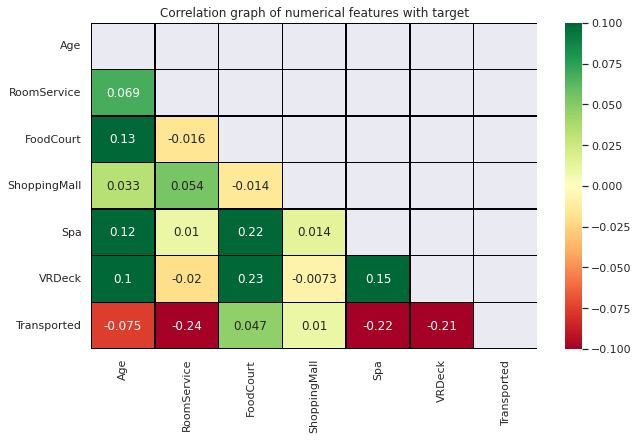

In [70]:
matrix = np.triu(train_df.select_dtypes(include=[float, bool]).corr())

sns.set(rc={'figure.figsize': (10, 6)})

sns.heatmap(train_df.select_dtypes(include=[float, bool]).corr(),
            annot=True, vmin=-.1, vmax=.1, center=0, cmap='RdYlGn',
            linewidths=.5, linecolor='black', mask=matrix) \
    .set(title='Correlation graph of numerical features with target')

del matrix

## Feature engineering

In [71]:
print(f'train_df has {train_df["Cabin"].nunique()} unique values')
print(f'test_df has {test_df["Cabin"].nunique()} unique values')

train_df has 6560 unique values
test_df has 3265 unique values


In [72]:
# Perhaps because of the numbers, so many unique values have been created?
test_df["Cabin"]

0          G/3/S
1          F/4/S
2          C/0/S
3          C/1/S
4          F/5/S
          ...   
4272    G/1496/S
4273         NaN
4274     D/296/P
4275     D/297/P
4276    G/1498/S
Name: Cabin, Length: 4277, dtype: object

In [73]:
# Delete numbers and create new columns for train_df and test_df

train_df['CabinDeck'] = train_df['Cabin'].str.split('/', expand=True)[0]
train_df['CabinSide'] = train_df['Cabin'].str.split('/', expand=True)[2]

test_df['CabinDeck'] = test_df['Cabin'].str.split('/', expand=True)[0]
test_df['CabinSide'] = test_df['Cabin'].str.split('/', expand=True)[2]

<b> Let's check for a match

In [74]:
print(
    f'train_df[\"CabinDeck\"] has {train_df["CabinDeck"].nunique()} unique values')
print(
    f'test_df[\"CabinDeck\"] has {test_df["CabinDeck"].nunique()} unique values', end='\n\n')

print(
    f'train_df[\"CabinSide\"] has {train_df["CabinSide"].nunique()} unique values')
print(
    f'test_df[\"CabinSide\"] has {test_df["CabinSide"].nunique()} unique values')

train_df["CabinDeck"] has 8 unique values
test_df["CabinDeck"] has 8 unique values

train_df["CabinSide"] has 2 unique values
test_df["CabinSide"] has 2 unique values


In [75]:
train_df["CabinDeck"].unique() in test_df["CabinDeck"].unique()  # ok

True

In [76]:
test_df["CabinSide"].unique() in test_df["CabinSide"].unique()  # ok

True

<b> Let's check the hypothesis that we had at the very beginning (when train_df was defined)

In [77]:
# To split 'PassengerId' and choose number before '_'

train_df['PassengerIdFirstNumber'] = train_df['PassengerId'].apply(
    lambda x: str(x).split('_')[0])

# To split 'Name' and choose last name

train_df['Surname'] = train_df['Name'].str.split(" ", expand=True)[1]

# Concatenate values 'Surname' and 'PassengerId'

train_df['Surname&PassIdFirstNumber'] = train_df['Surname'] + \
    train_df['PassengerIdFirstNumber']

# Instead of removing duplicates, mark them ignoring NaN

mask = np.where(
    train_df['Surname&PassIdFirstNumber'].dropna()
    .duplicated(keep=False), 1, 0)

train_df = train_df.merge(pd.DataFrame(
    mask, columns=['RepeatedBySurname&PassIdFirstNum']),
    right_index=True, left_index=True, how='left')

del mask

In [78]:
# We don't need 'Cabin', 'Name', 'PassengerIdFirstNumber', 
# 'Surname' and 'Surname&PassIdFirstNumber' anymore

train_df.drop(
    columns=['Cabin', 'Name', 'PassengerIdFirstNumber',
             'Surname', 'Surname&PassIdFirstNumber'],
    inplace=True)
train_df

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,CabinDeck,CabinSide,RepeatedBySurname&PassIdFirstNum
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,P,0.0
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,S,0.0
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,S,1.0
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,S,1.0
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,S,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False,A,P,NaN
8689,9278_01,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False,G,S,NaN
8690,9279_01,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True,G,S,NaN
8691,9280_01,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False,E,S,NaN


In [79]:
# To do the same for test_df

test_df['PassengerIdFirstNumber'] = test_df['PassengerId'].apply(
    lambda x: str(x).split('_')[0])
test_df['Surname'] = test_df['Name'].str.split(" ", expand=True)[1]
test_df['Surname&PassIdFirstNumber'] = test_df['Surname'] + \
    test_df['PassengerIdFirstNumber']
mask = np.where(
    test_df['Surname&PassIdFirstNumber'].dropna()
    .duplicated(keep=False), 1, 0)
test_df = test_df.merge(pd.DataFrame(
    mask, columns=['RepeatedBySurname&PassIdFirstNum']),
    right_index=True, left_index=True, how='left')

del mask
test_df.drop(
    columns=['Cabin', 'Name', 'PassengerIdFirstNumber',
             'Surname', 'Surname&PassIdFirstNumber'],
    inplace=True)

## Filling NaN

In [80]:
train_df.isna().sum()

PassengerId                           0
HomePlanet                          201
CryoSleep                           217
Destination                         182
Age                                 179
VIP                                 203
RoomService                         181
FoodCourt                           183
ShoppingMall                        208
Spa                                 183
VRDeck                              188
Transported                           0
CabinDeck                           199
CabinSide                           199
RepeatedBySurname&PassIdFirstNum    200
dtype: int64

In [81]:
# Filling NaN on object type columns by mode

# without 'PassengerId', because it is not NaN
obj_columns = train_df.select_dtypes(include='object').columns[1:]

for i in obj_columns:
    train_df[i].fillna(train_df[i].mode()[0], inplace=True)
    test_df[i].fillna(test_df[i].mode()[0], inplace=True)  # for test too

del obj_columns

In [82]:
train_df.isna().sum()

PassengerId                           0
HomePlanet                            0
CryoSleep                             0
Destination                           0
Age                                 179
VIP                                   0
RoomService                         181
FoodCourt                           183
ShoppingMall                        208
Spa                                 183
VRDeck                              188
Transported                           0
CabinDeck                             0
CabinSide                             0
RepeatedBySurname&PassIdFirstNum    200
dtype: int64

<b> If you are sleeping, then it is logical that you cannot buy something, so you should fill in zeros for all NaN on purchases for those who are sleeping. But we still have a median for all purchases equal to zero, which makes it easier for us to fill in the features.
    
<b> For purchases, it is fair to take the median, since there are a lot of those who did not make a purchase at all, which means that if we calculate by the average, then we will distort the trend in the data.

In [83]:
# Let's look at the median of 'RepeatedBySurname&PassIdFirstNum'

train_df['RepeatedBySurname&PassIdFirstNum'].median()

0.0

In [84]:
# Fill in the numerical features with a median that is equal to zero

# without 'Age'
num_columns = train_df.select_dtypes(include=float).columns[1:]

for i in num_columns:
    train_df[i].fillna(0, inplace=True)
    test_df[i].fillna(0, inplace=True)  # for test too

del num_columns

In [85]:
# And fill in 'Age' by mean and round it

train_df['Age'].fillna(train_df['Age'].mean(), inplace=True)
train_df['Age'] = train_df['Age'].astype(int)

test_df['Age'].fillna(test_df['Age'].mean(), inplace=True)
test_df['Age'] = test_df['Age'].astype(int)

In [86]:
train_df.isna().sum()

PassengerId                         0
HomePlanet                          0
CryoSleep                           0
Destination                         0
Age                                 0
VIP                                 0
RoomService                         0
FoodCourt                           0
ShoppingMall                        0
Spa                                 0
VRDeck                              0
Transported                         0
CabinDeck                           0
CabinSide                           0
RepeatedBySurname&PassIdFirstNum    0
dtype: int64

## Augmentation

In [87]:
# Purcheses
train_df['TotalPaid'] = train_df.loc[:, 'RoomService':'VRDeck'].sum(axis=1)
train_df['HasPaid'] = (train_df['TotalPaid'] > 0).astype(int)
train_df['HasPaidRoomService'] = (train_df['RoomService'] > 0).astype(int)
train_df['HasPaidFoodCourt'] = (train_df['FoodCourt'] > 0).astype(int)
train_df['HasPaidShoppingMall'] = (train_df['ShoppingMall'] > 0).astype(int)
train_df['HasPaidSpa'] = (train_df['Spa'] > 0).astype(int)
train_df['HasPaidVRDeck'] = (train_df['VRDeck'] > 0).astype(int)

# Age
train_df['IsAdult'] = (train_df['Age'] >= 18).astype(int)
train_df["IsEmbryo"] = (train_df['Age'] == 0).astype(int)

In [88]:
# The same for test_df

test_df['TotalPaid'] = test_df.loc[:, 'RoomService':'VRDeck'].sum(axis=1)
test_df['HasPaid'] = (test_df['TotalPaid'] > 0).astype(int)
test_df['HasPaidRoomService'] = (test_df['RoomService'] > 0).astype(int)
test_df['HasPaidFoodCourt'] = (test_df['FoodCourt'] > 0).astype(int)
test_df['HasPaidShoppingMall'] = (test_df['ShoppingMall'] > 0).astype(int)
test_df['HasPaidSpa'] = (test_df['Spa'] > 0).astype(int)
test_df['HasPaidVRDeck'] = (test_df['VRDeck'] > 0).astype(int)
test_df['IsAdult'] = (test_df['Age'] >= 18).astype(int)
test_df["IsEmbryo"] = (test_df['Age'] == 0).astype(int)

In [89]:
# Transform bool (objects) type columns to int (0-1)

train_df['VIP'] = train_df['VIP'].replace({False: 0, True: 1}).astype(int)
test_df['VIP'] = test_df['VIP'].replace({False: 0, True: 1}).astype(int)

train_df['CryoSleep'] = train_df['CryoSleep'].replace(
    {False: 0, True: 1}).astype(int)
test_df['CryoSleep'] = test_df['CryoSleep'].replace(
    {False: 0, True: 1}).astype(int)

In [90]:
# OHE for train and test datasets

train_df = pd.get_dummies(train_df,
                          columns=['HomePlanet', 'Destination',
                                   'CabinDeck', 'CabinSide'],
                          drop_first=True)

test_df = pd.get_dummies(test_df,
                         columns=['HomePlanet', 'Destination',
                                  'CabinDeck', 'CabinSide'],
                         drop_first=True)

In [91]:
# remove 'PassengerId' as columnn and set it as index

train_df.set_index('PassengerId', inplace=True)
test_df.set_index('PassengerId', inplace=True)

In [92]:
train_df.info() # ok

<class 'pandas.core.frame.DataFrame'>
Index: 8693 entries, 0001_01 to 9280_02
Data columns (total 31 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CryoSleep                         8693 non-null   int64  
 1   Age                               8693 non-null   int64  
 2   VIP                               8693 non-null   int64  
 3   RoomService                       8693 non-null   float64
 4   FoodCourt                         8693 non-null   float64
 5   ShoppingMall                      8693 non-null   float64
 6   Spa                               8693 non-null   float64
 7   VRDeck                            8693 non-null   float64
 8   Transported                       8693 non-null   bool   
 9   RepeatedBySurname&PassIdFirstNum  8693 non-null   float64
 10  TotalPaid                         8693 non-null   float64
 11  HasPaid                           8693 non-null   int64  
 12  Ha

# Machine Learning

## Training

<b> The choice of the model and its parameters was obtained empirically

In [93]:
from sklearn.model_selection import train_test_split

X = train_df.drop(columns=['Transported'])
y = train_df['Transported']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=14)

In [94]:
import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV

grid_LGBM = RandomizedSearchCV(
    lgb.LGBMClassifier(verbose=0, random_state=14),
    param_distributions={'max_depth': range(1, 30),
                         'lr': np.linspace(0.001, 0.3, 300)},
    scoring='f1',
    cv=5,
    n_jobs=-1,
    return_train_score=True,
    n_iter=20,
    verbose=5,
    random_state=14
)

grid_LGBM.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LGBMClassifier(random_state=14, verbose=0),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'lr': array([0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009,
       0.01 , 0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017, 0.018,
       0.019, 0.02 , 0.021, 0.022, 0.023, 0.024, 0.025, 0.026, 0.027,
       0.028, 0.029, 0.03 , 0.031, 0.032, 0.033, 0.034, 0.035, 0.036,
       0.037, 0....
       0.253, 0.254, 0.255, 0.256, 0.257, 0.258, 0.259, 0.26 , 0.261,
       0.262, 0.263, 0.264, 0.265, 0.266, 0.267, 0.268, 0.269, 0.27 ,
       0.271, 0.272, 0.273, 0.274, 0.275, 0.276, 0.277, 0.278, 0.279,
       0.28 , 0.281, 0.282, 0.283, 0.284, 0.285, 0.286, 0.287, 0.288,
       0.289, 0.29 , 0.291, 0.292, 0.293, 0.294, 0.295, 0.296, 0.297,
       0.298, 0.299, 0.3  ]),
                                        'max_depth': range(1, 30)},
                   random_state=14, return_train_score=True, scoring='f1',
           

## Metrics

In [1]:
print(f'Best score f1: {grid_LGBM.best_score_}')
print(f'Best parameters: {grid_LGBM.best_params_}')

NameError: name 'grid_LGBM' is not defined

In [96]:
from sklearn.metrics import classification_report

print("TRAIN")
print(
    classification_report(y_train, grid_LGBM.best_estimator_.predict(X_train)))
print('\n')
print("TEST")
print(
    classification_report(y_test, grid_LGBM.best_estimator_.predict(X_test)))

TRAIN
              precision    recall  f1-score   support

       False       0.85      0.80      0.83      3451
        True       0.81      0.87      0.84      3503

    accuracy                           0.83      6954
   macro avg       0.83      0.83      0.83      6954
weighted avg       0.83      0.83      0.83      6954



TEST
              precision    recall  f1-score   support

       False       0.83      0.77      0.80       864
        True       0.79      0.84      0.81       875

    accuracy                           0.81      1739
   macro avg       0.81      0.80      0.80      1739
weighted avg       0.81      0.81      0.80      1739



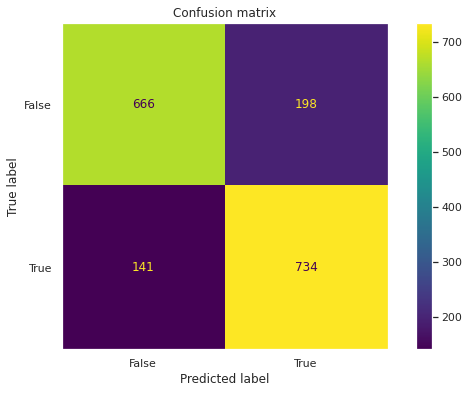

In [97]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

confusion_matrix = confusion_matrix(
    y_test, grid_LGBM.best_estimator_.predict(X_test))

cm_display = ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix, display_labels=[False, True])

sns.set_style('darkgrid', {'axes.grid': False})
cm_display.plot().ax_.set_title('Confusion matrix')
sns.set_style('darkgrid', {'axes.grid' : True})

plt.show()

## Feature importantces

In [98]:
feat_imp = sorted(zip(X_train.columns,
                      grid_LGBM.best_estimator_.feature_importances_),
                  key=lambda x: -x[1])
top10 = np.array(feat_imp[:10])

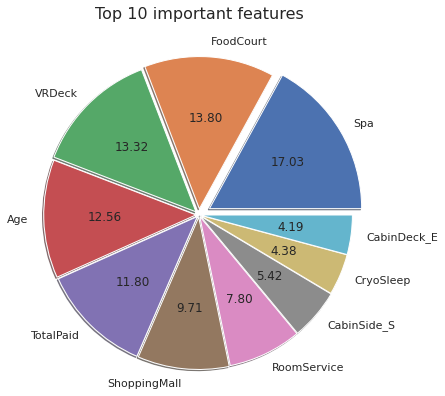

In [99]:
fig, ax = plt.subplots()

exp = [.2, .1, .07, .05, .04, .04, .03, .03, .02, .02]

ax.pie(top10[:, 1], labels=top10[:, 0], autopct='%.2f',
        shadow=True, explode=exp, radius=2.5)
ax.set_title('Top 10 important features', y=1.75, 
             fontdict={'fontsize': 16})

fig.set_size_inches(10, 2.8)

plt.show()

In [100]:
!pip3 install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.9/575.9 KB 8.8 MB/s eta 0:00:00


In [101]:
import shap

explainer = shap.TreeExplainer(grid_LGBM.best_estimator_)
shap_values = explainer.shap_values(X_train)

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


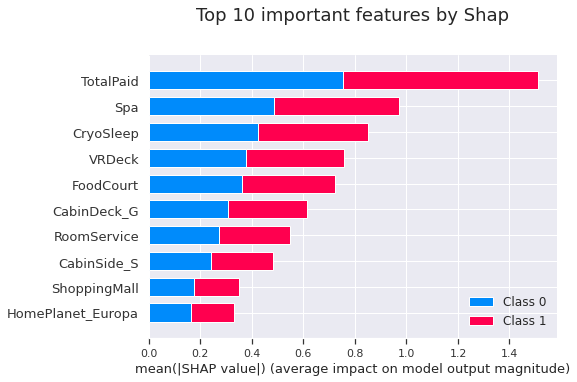

In [102]:
fig, ax = plt.subplots()
ax.set_title('Top 10 important features by Shap', y=1.1, 
             fontdict={'fontsize': 18})

shap.summary_plot(shap_values, X_train, max_display=10)

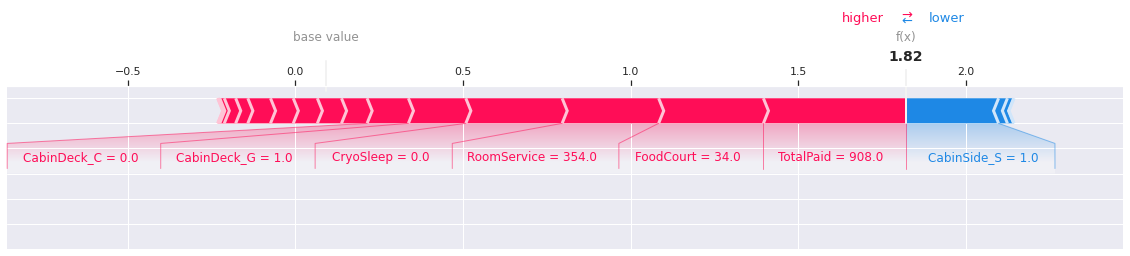

In [103]:
# for 1 object

shap.force_plot(explainer.expected_value[1], shap_values[0][0], X_train.iloc[0], matplotlib=True)

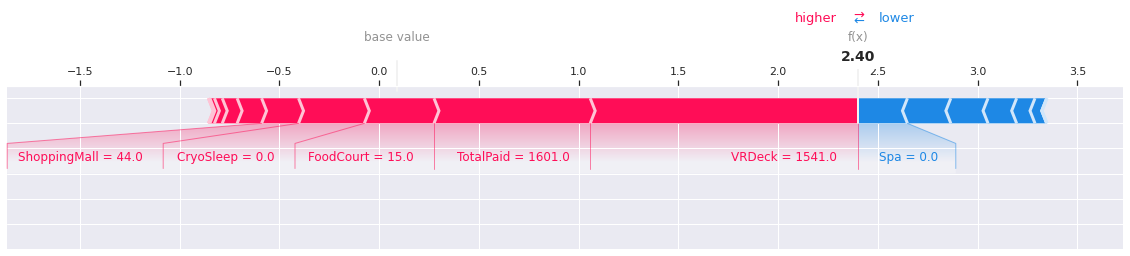

In [104]:
# for 14 object

shap.force_plot(explainer.expected_value[1], shap_values[0][13], X_train.iloc[13], matplotlib=True)

## Prediction and saving result

In [105]:
y_pred = grid_LGBM.best_estimator_.predict(test_df)

In [106]:
submission = pd.DataFrame(test_df.index)
submission['Transported'] = y_pred.astype(bool)

submission.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True


In [107]:
submission.to_csv('/content/submission.csv', index=False)